# PFC 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### cargamos csv

In [2]:
df = pd.read_csv("fumarbeberpfc.csv", delimiter=";")

In [3]:
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...        126            92        17.1              1   
1           1  130  ...        148           121        15.8              1   
2           1  120  ...         74           104        15.8              1   
3           1  145  ...        104           106        17.6              1   
4           1  138  ...        117           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0        21        35         40                 1       Y  
1               0.9        20        36         27                 3       N  
2               0.9        47        32         68                 1       N  
3               1.1        29        34         18                 1       N  
4               0.8        19        12         25                 1       N  

[5 rows x 24 columns]

### comprobamos que no haya nulos

In [4]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

### creamos la columna IMC

In [5]:
df["IMC"]=df["weight"]/((df["height"]/100)*(df["height"]/100))

In [6]:
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...            92        17.1              1   
1           1  130  ...           121        15.8              1   
2           1  120  ...           104        15.8              1   
3           1  145  ...           106        17.6              1   
4           1  138  ...           104        13.8              1   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0               1.0        21        35         40                 1       Y   
1               0.9        20        36         27                 3       N   
2               0.9        47        32         68                 1       N   
3               1.1        29        34         18                 1       N   
4               0.8        19        12         25                 1       N   

         IMC  
0  25.951557  
1  24.691358  
2  27.548209  
3  26.122449  
4  22.038567  

[5 rows x 25 columns]

In [7]:
df.shape

(991346, 25)

### distribucion de las variables númericas

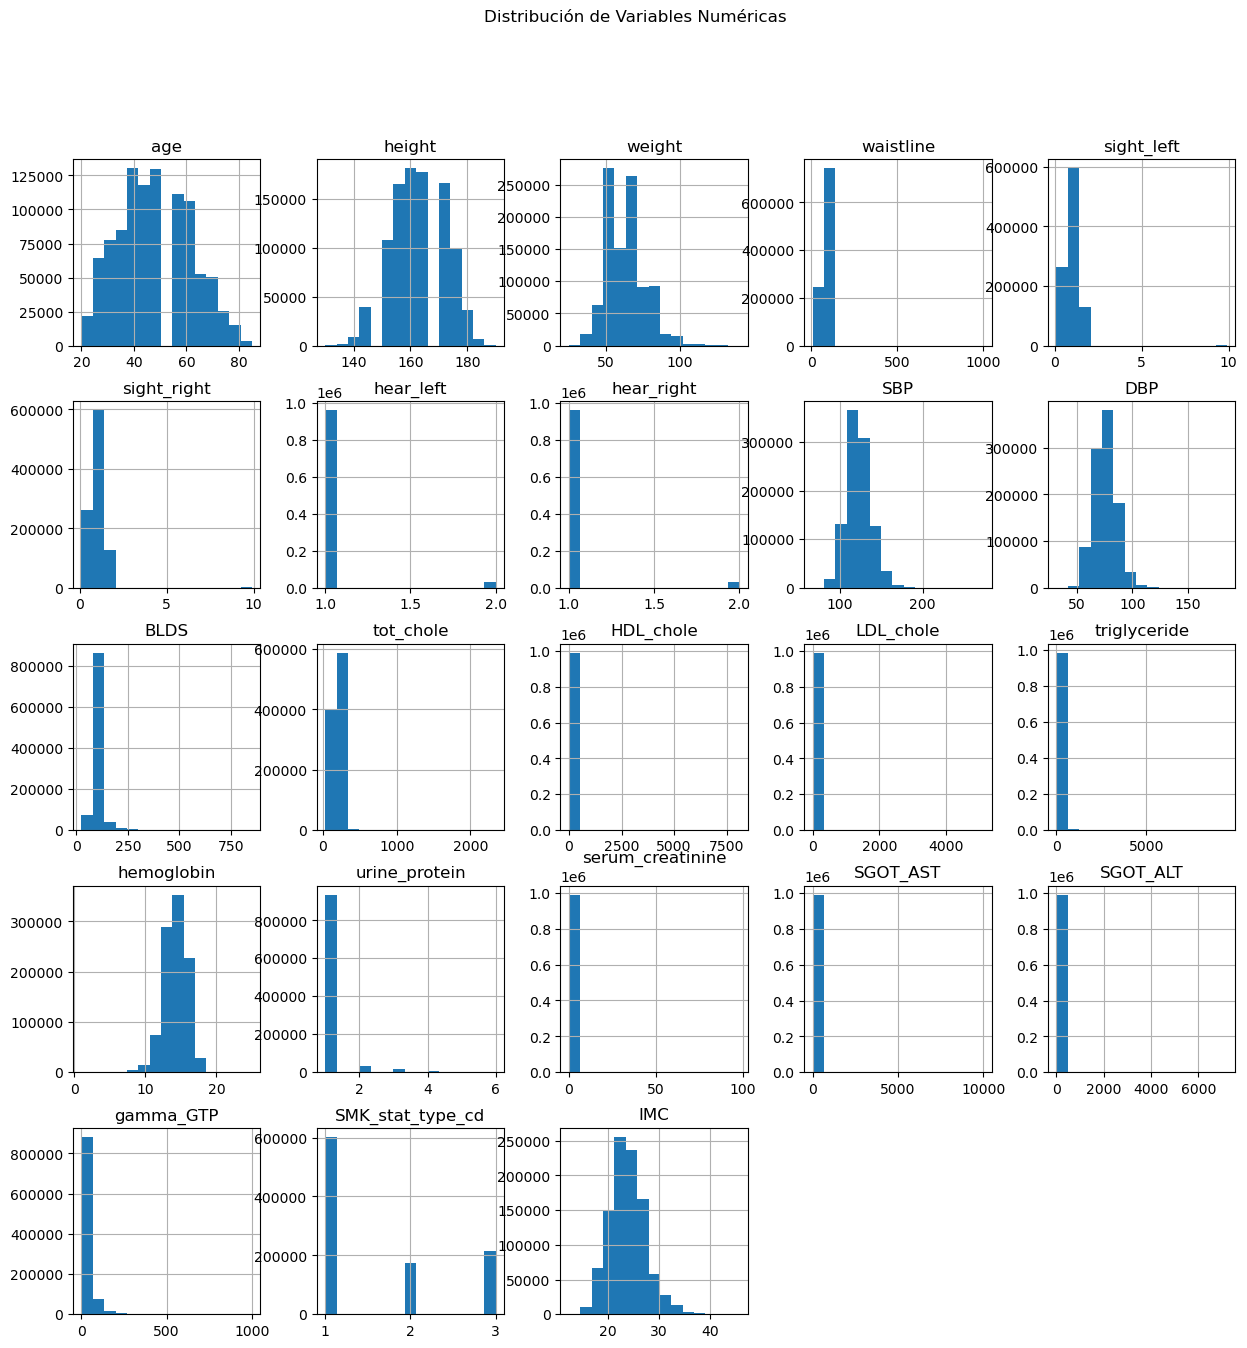

In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 15))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

### Distribución de las variables categóricas

In [9]:
categorical_cols = ['sex', 'hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd', 'DRK_YN']
for col in categorical_cols:
    print(f"Distribución de {col}:")
    print(df[col].value_counts(normalize=True) * 100)
    print()

Distribución de sex:
sex
Male      53.101036
Female    46.898964
Name: proportion, dtype: float64

Distribución de hear_left:
hear_left
1    96.850545
2     3.149455
Name: proportion, dtype: float64

Distribución de hear_right:
hear_right
1    96.952426
2     3.047574
Name: proportion, dtype: float64

Distribución de urine_protein:
urine_protein
1    94.333865
2     3.111931
3     1.654821
4     0.648310
5     0.199426
6     0.051647
Name: proportion, dtype: float64

Distribución de SMK_stat_type_cd:
SMK_stat_type_cd
1    60.770004
3    21.582172
2    17.647824
Name: proportion, dtype: float64

Distribución de DRK_YN:
DRK_YN
N    50.018661
Y    49.981339
Name: proportion, dtype: float64



### Visualización de distribuciones

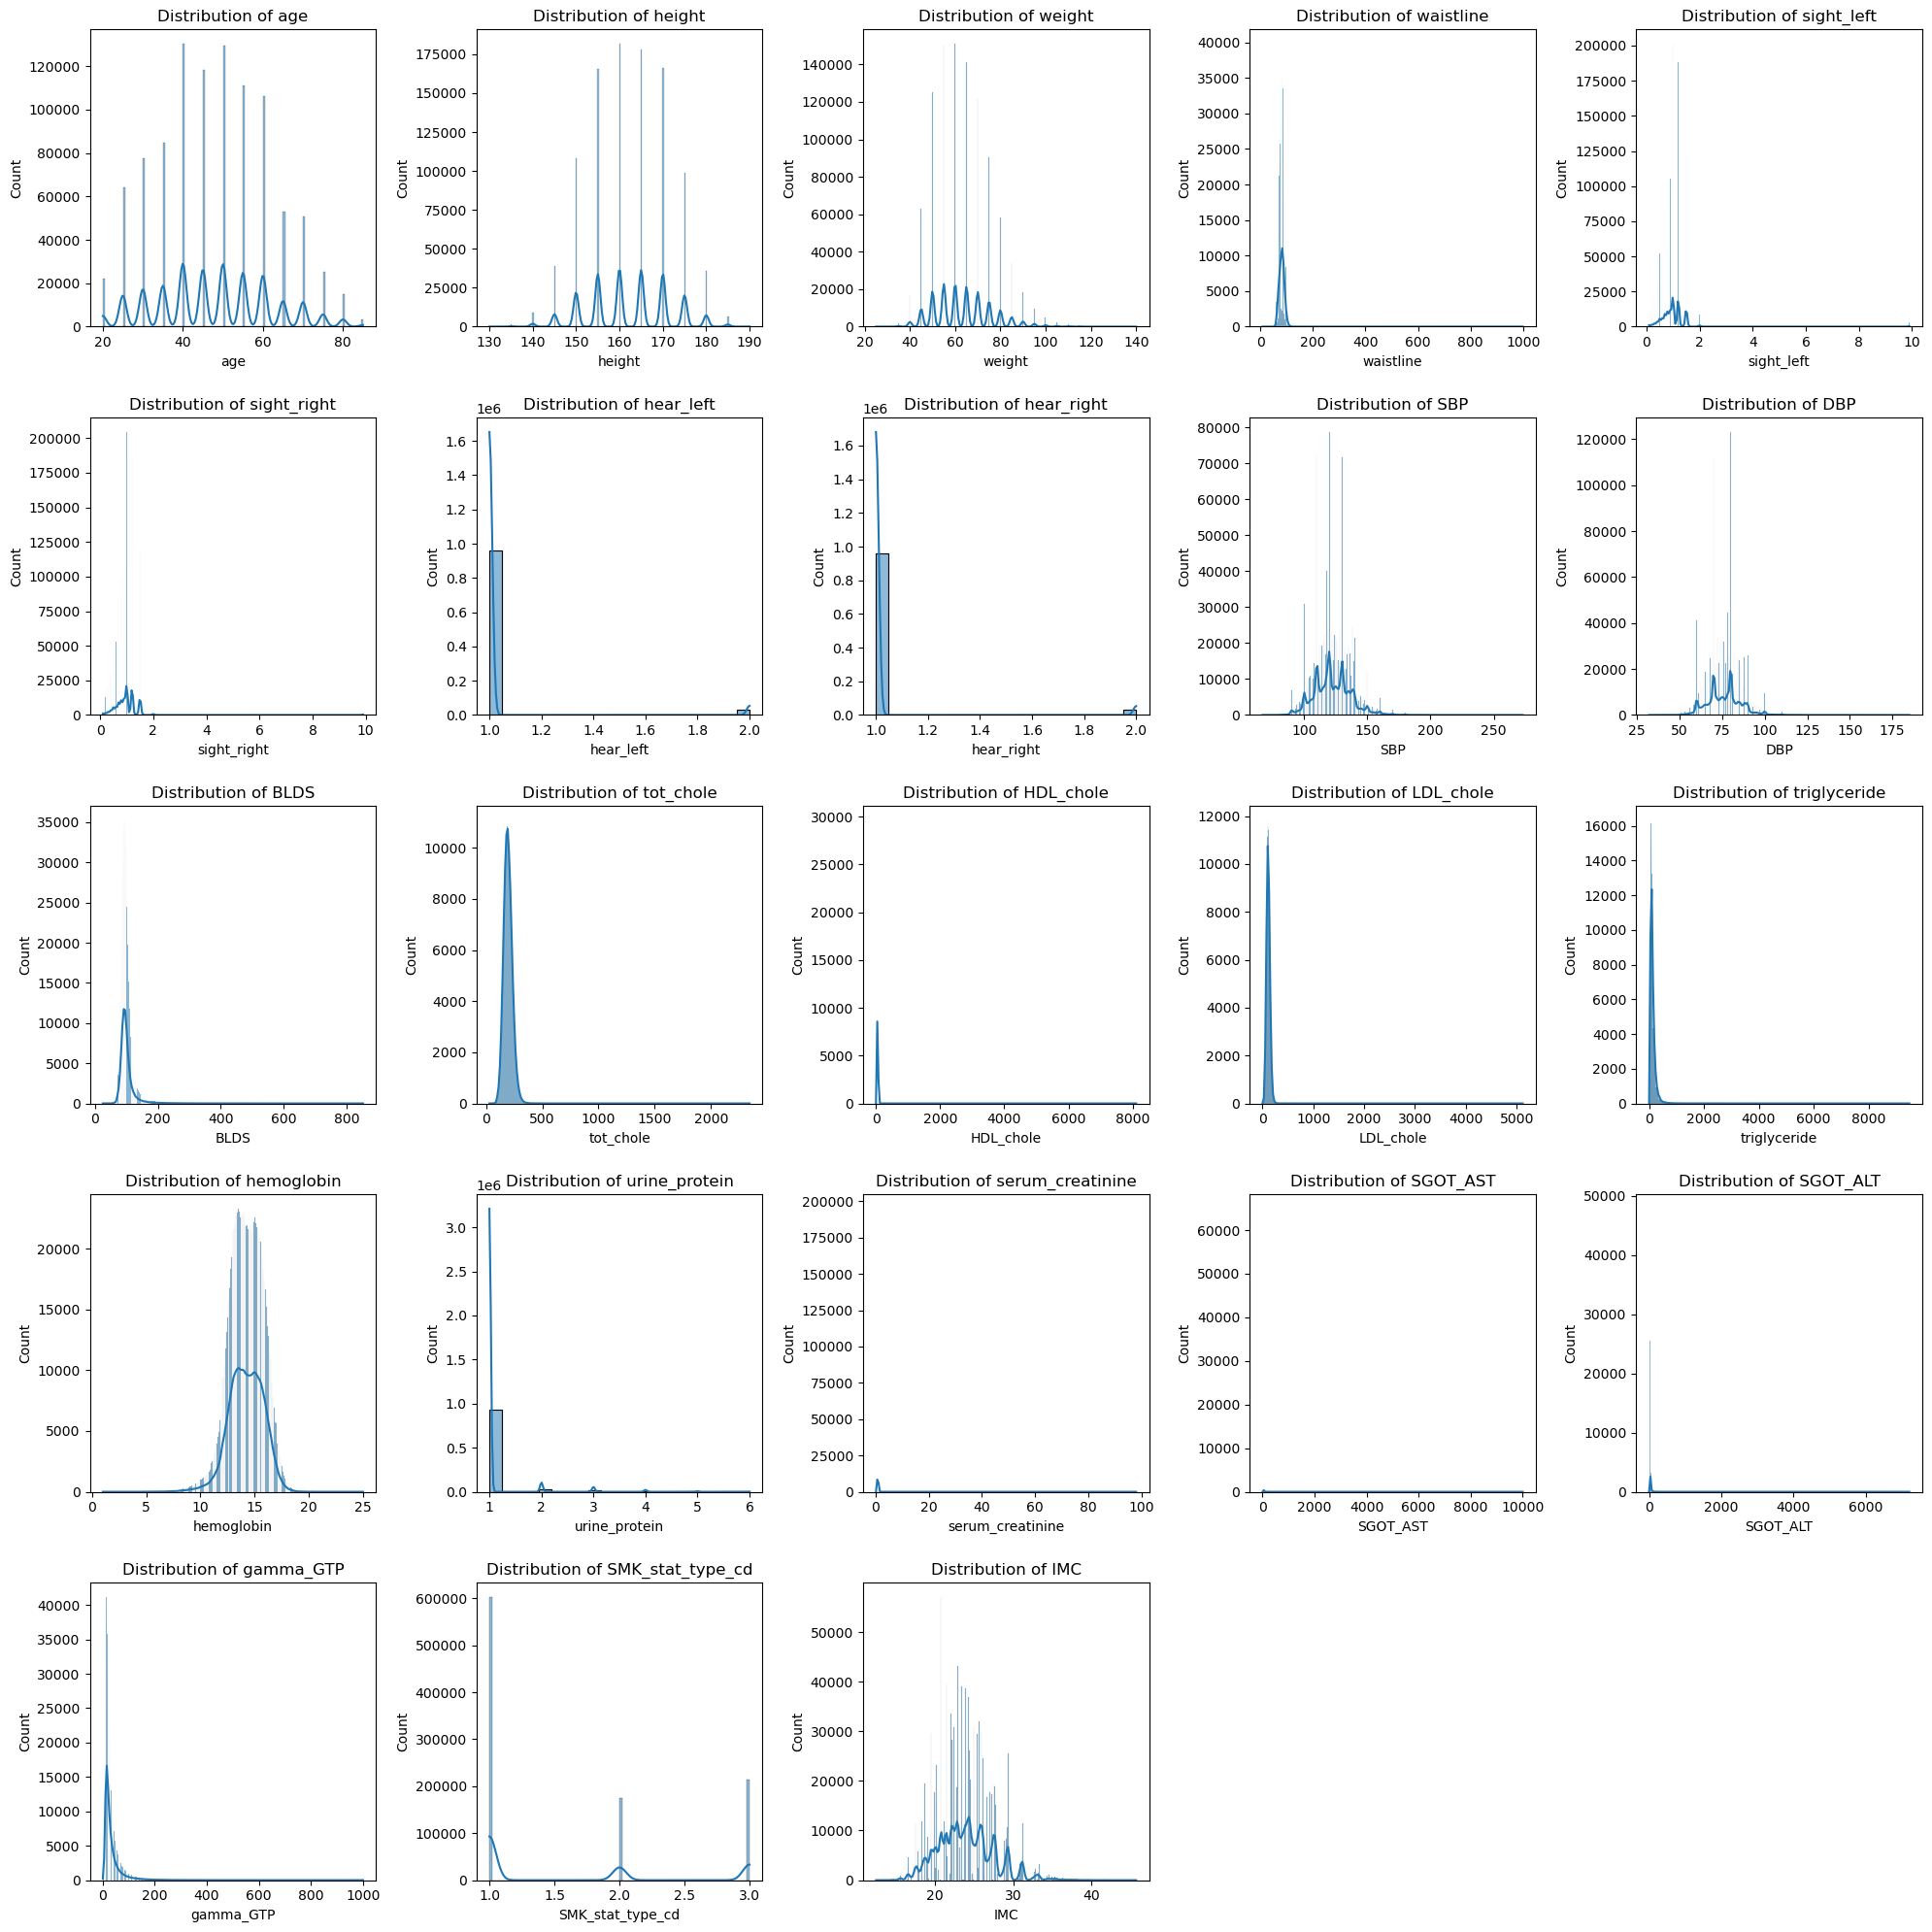

In [10]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### grafico de lineas del estado de fumador, respecto a la edad y el resto de variables

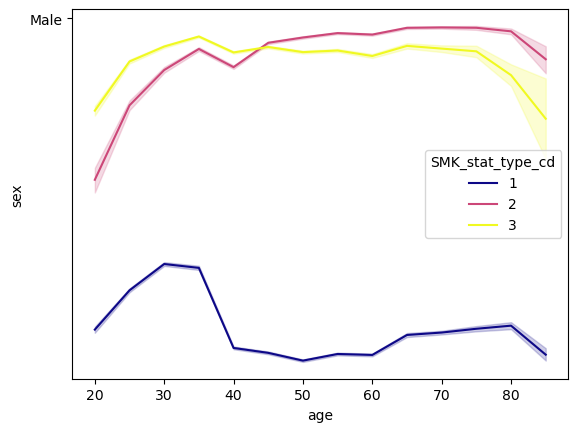

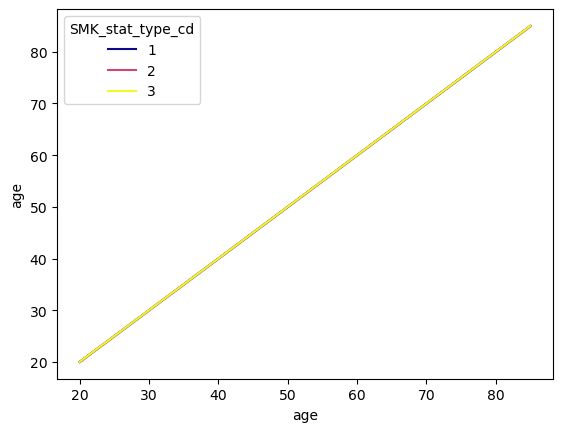

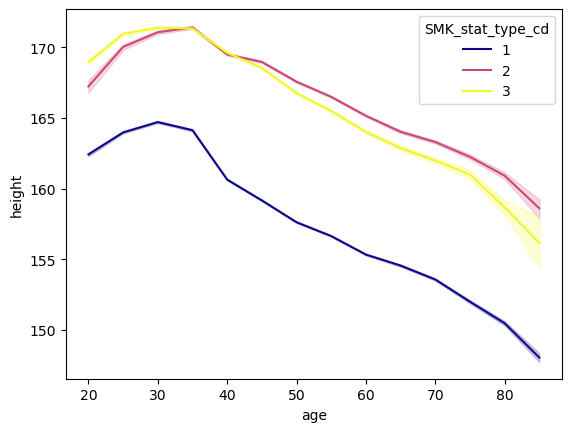

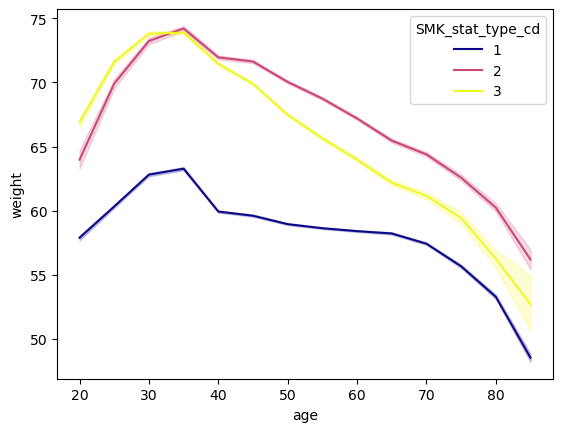

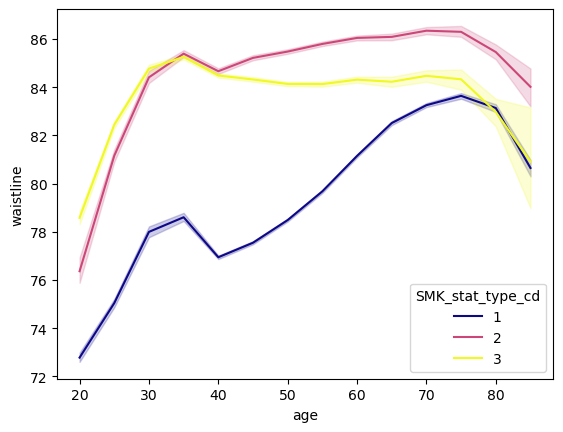

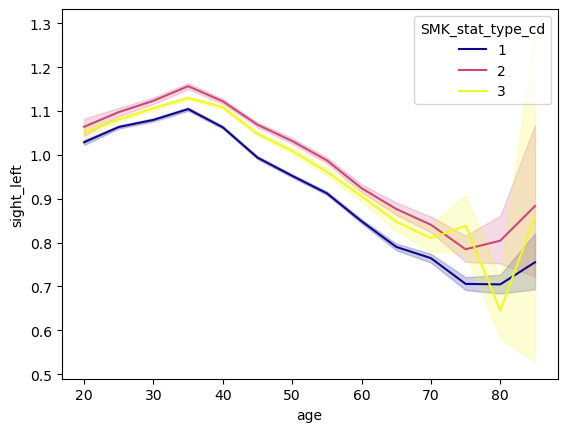

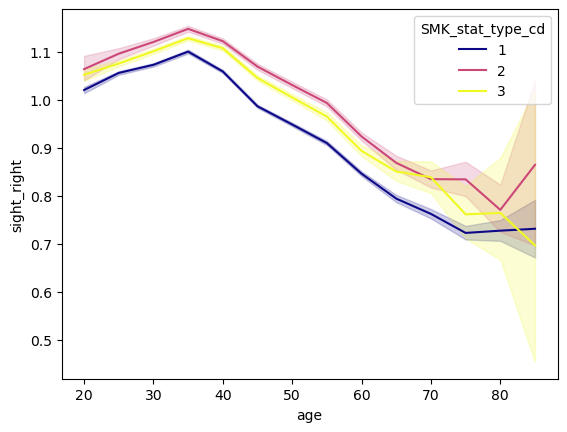

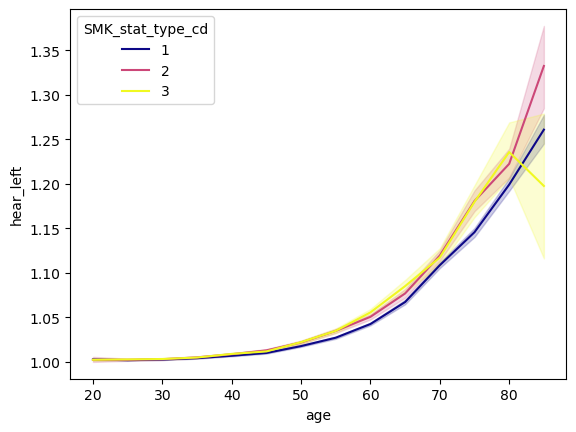

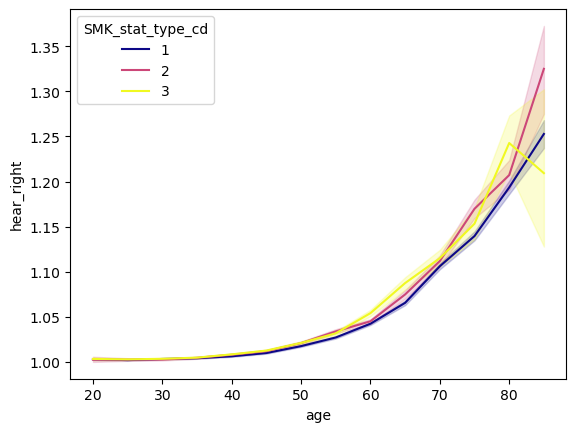

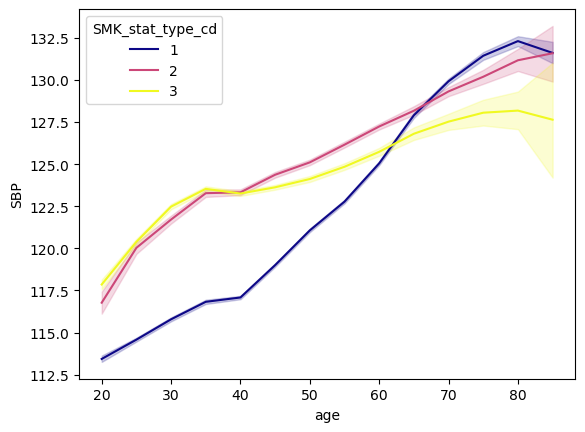

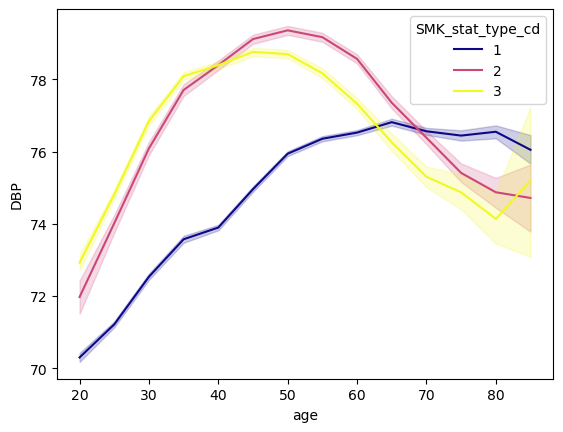

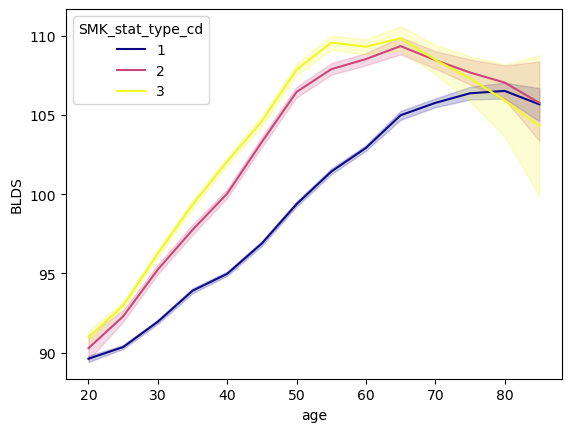

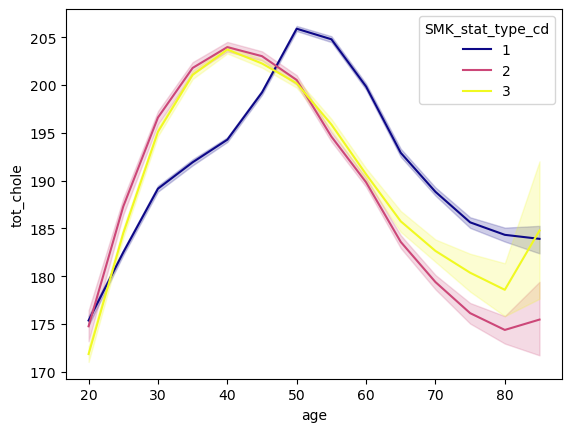

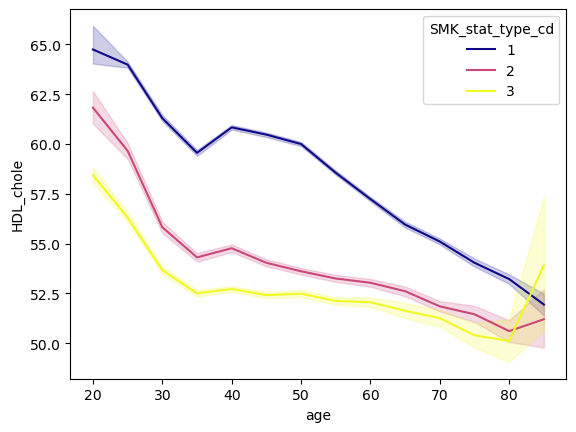

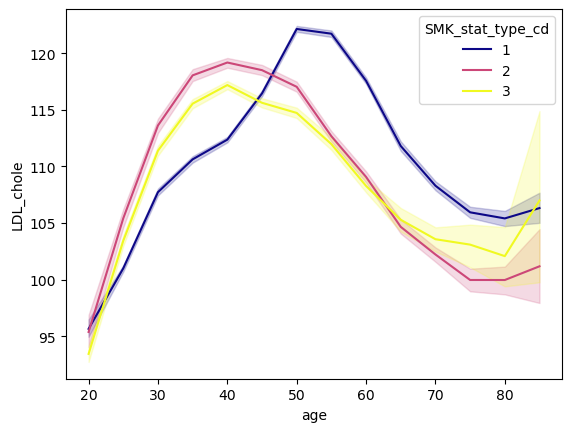

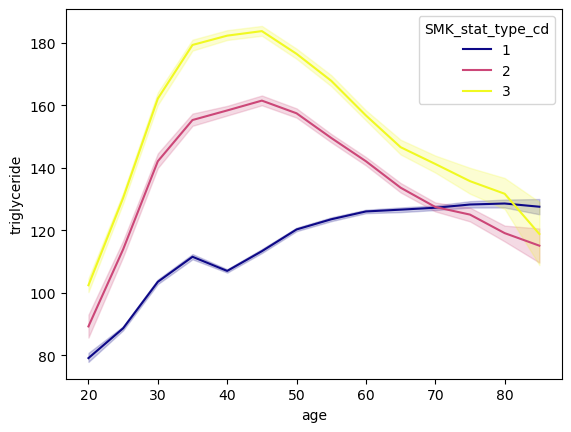

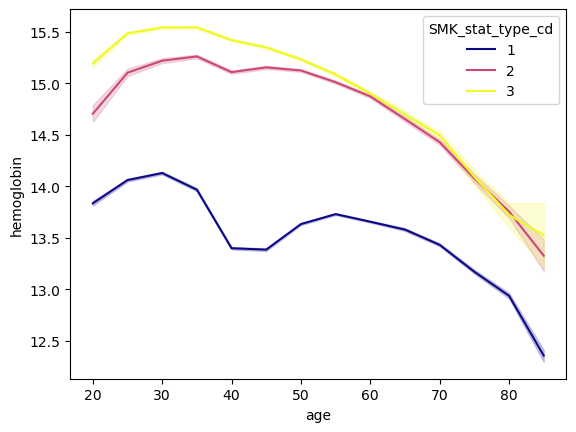

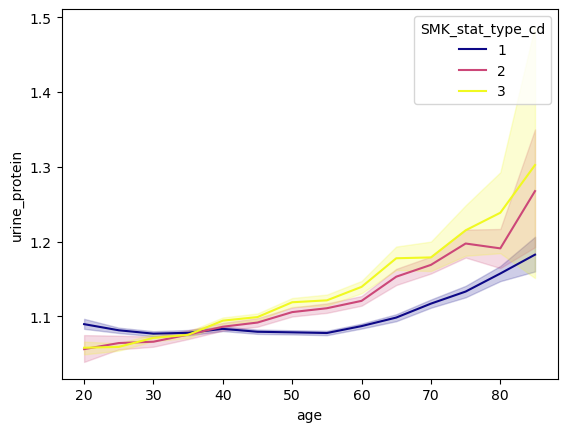

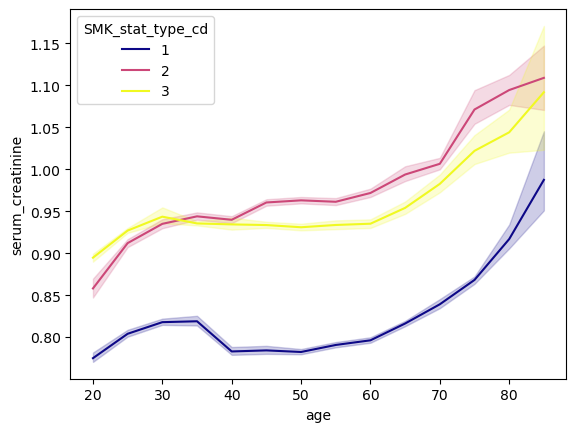

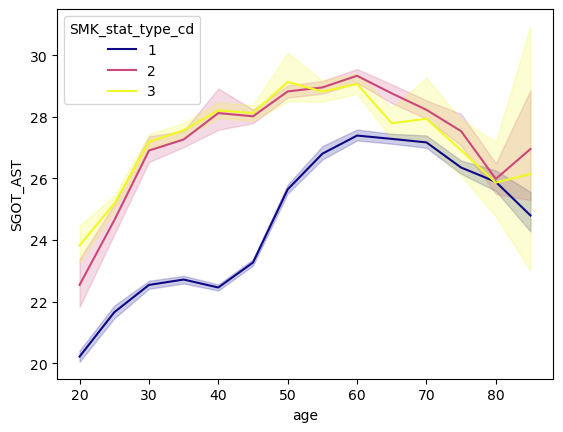

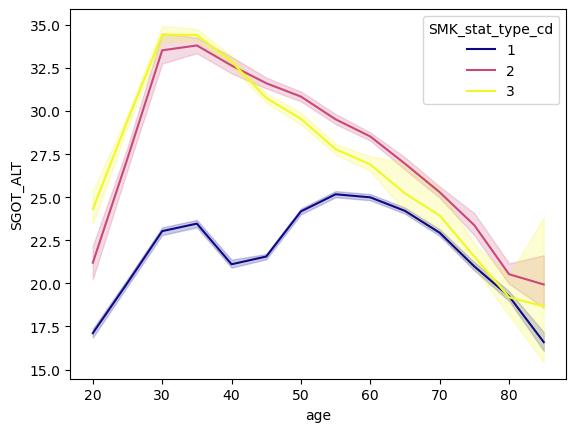

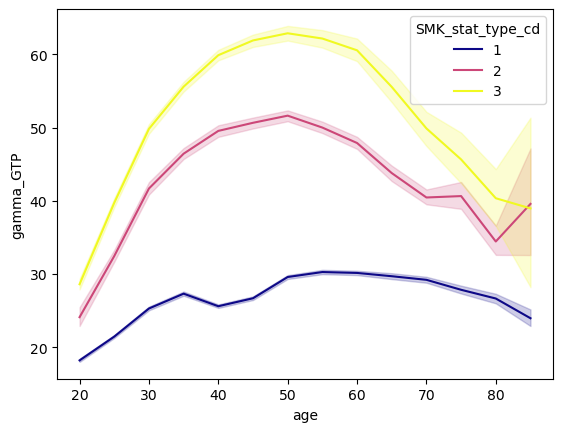

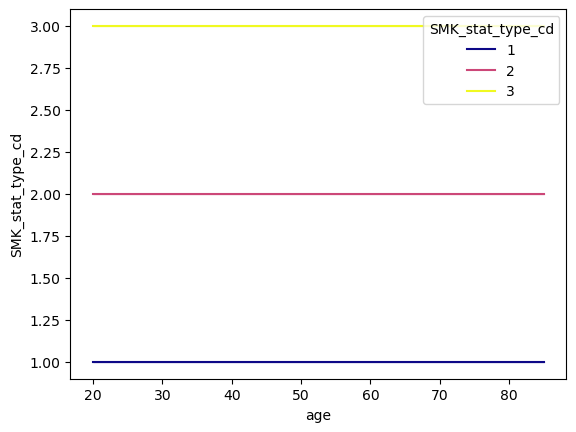

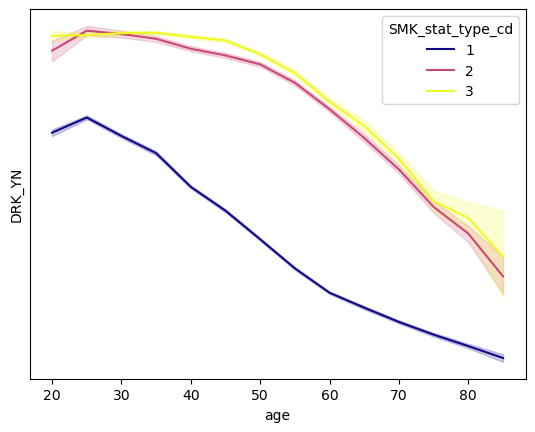

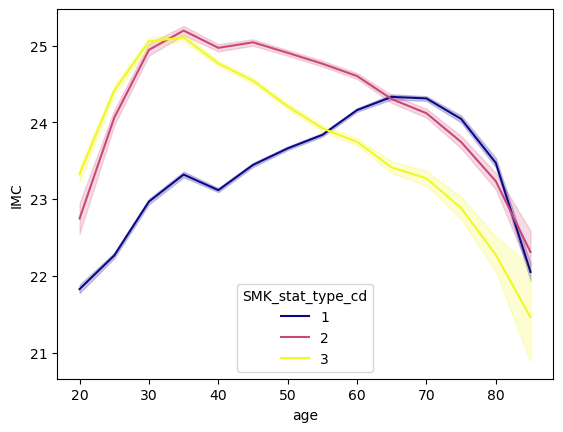

In [11]:
for i in df.columns:
    sns.lineplot(
        data=df,
        x="age",
        y=i,
        hue="SMK_stat_type_cd",
        palette="plasma"
    )
    plt.show()

### grafico de lineas del estado de bebedor, respecto a la edad y el resto de variables

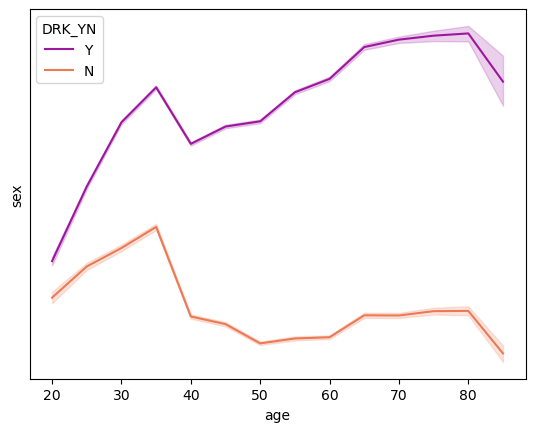

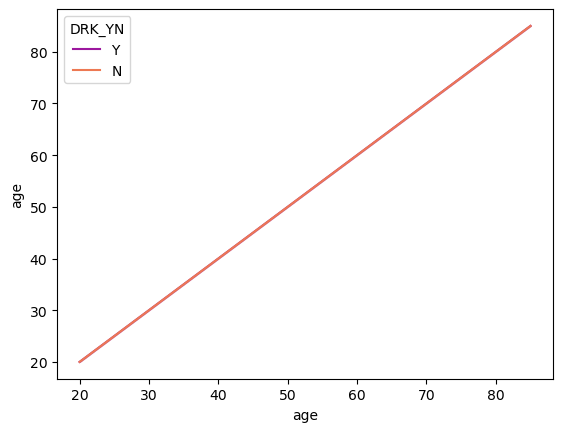

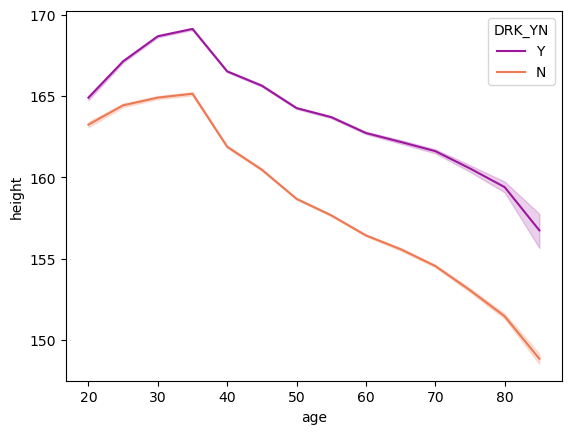

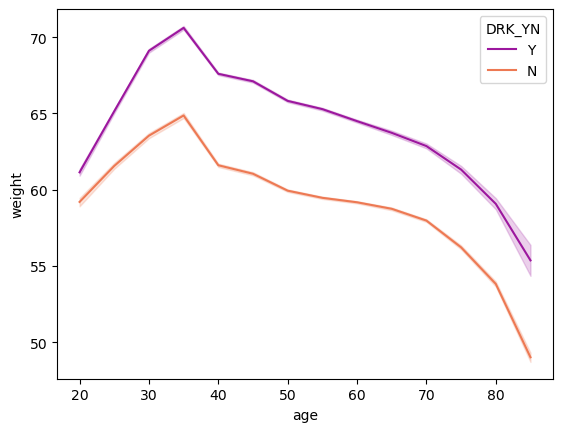

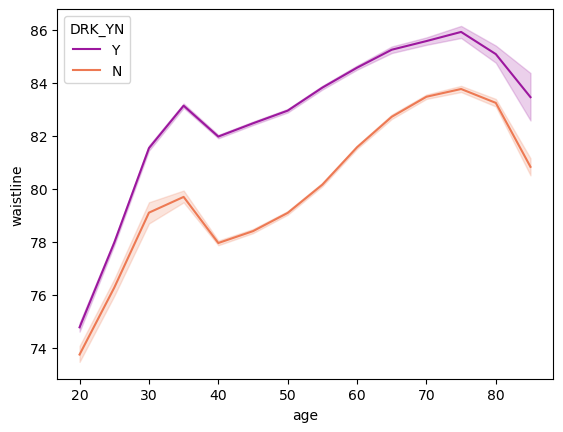

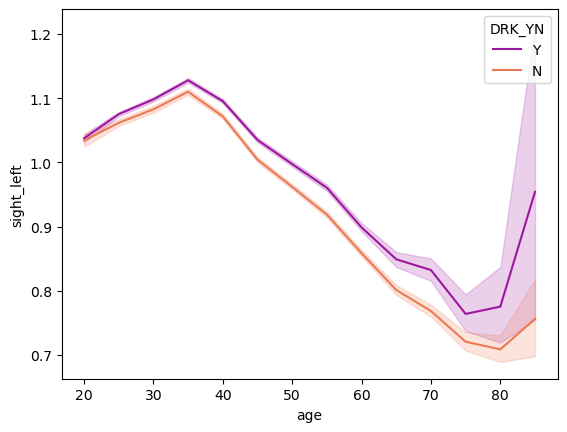

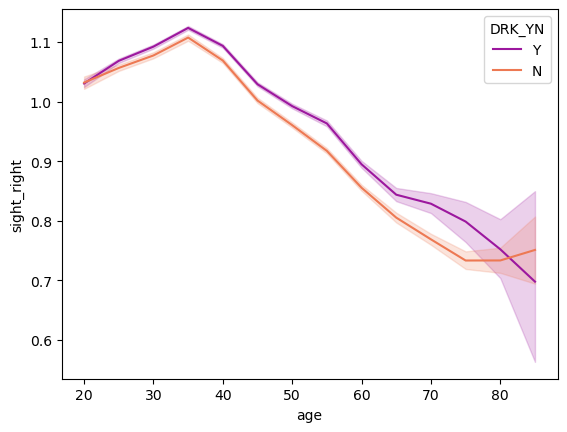

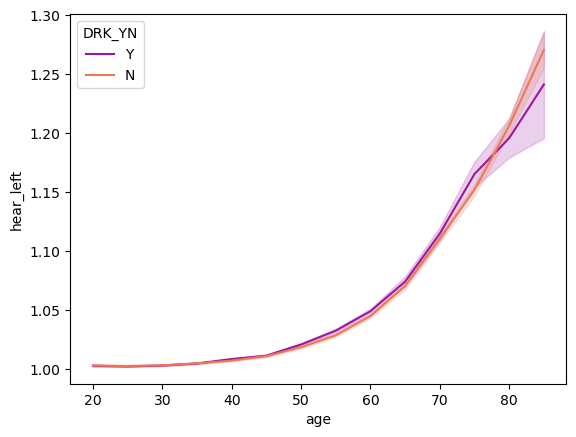

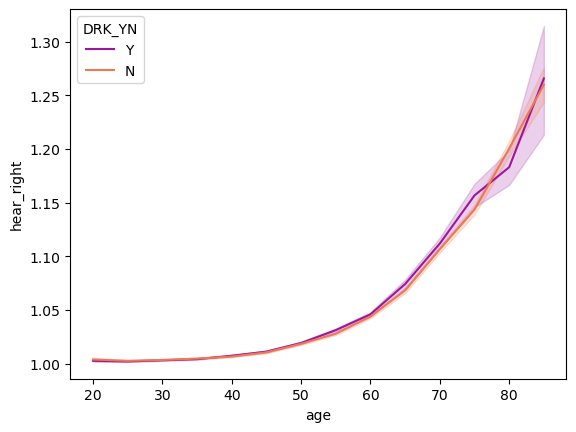

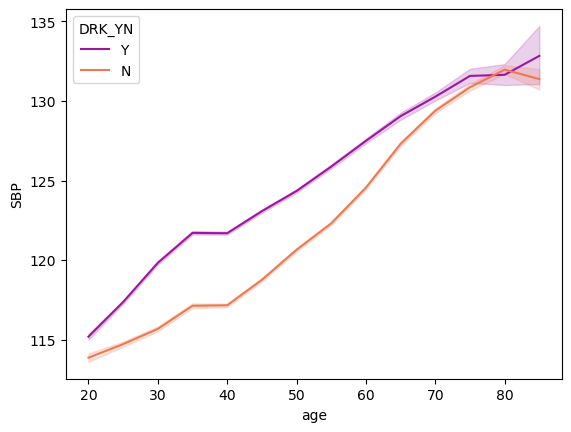

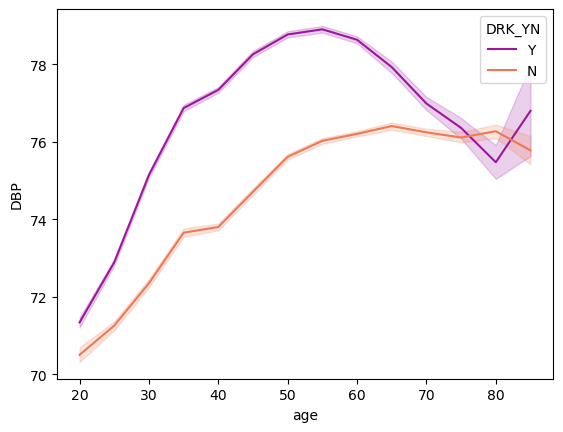

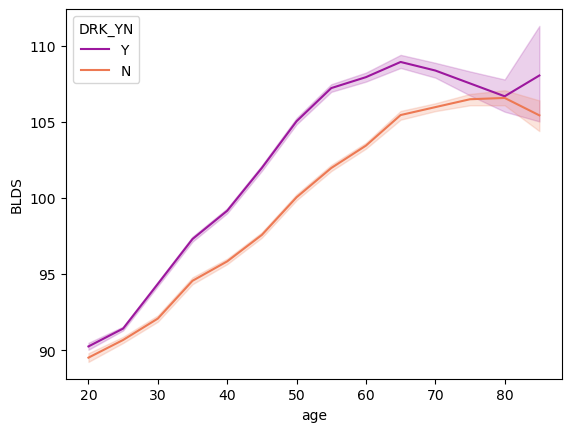

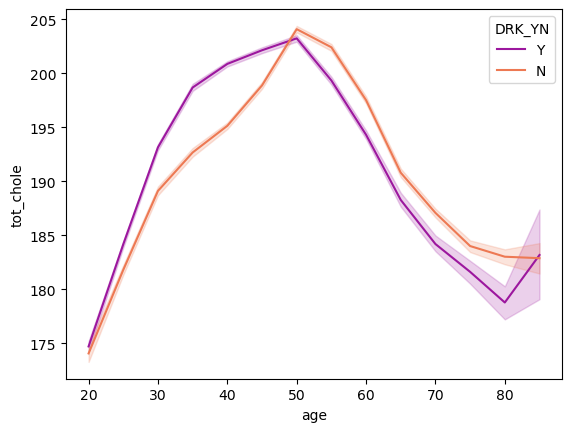

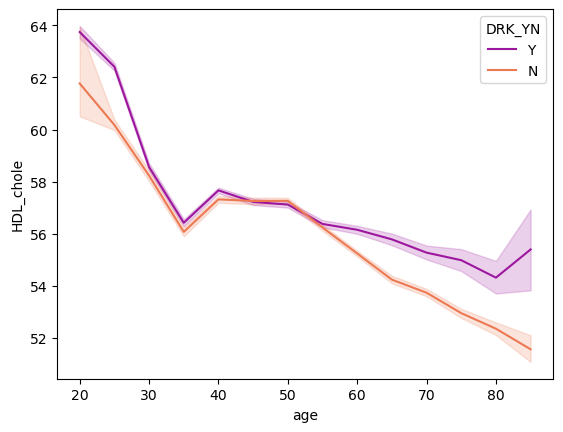

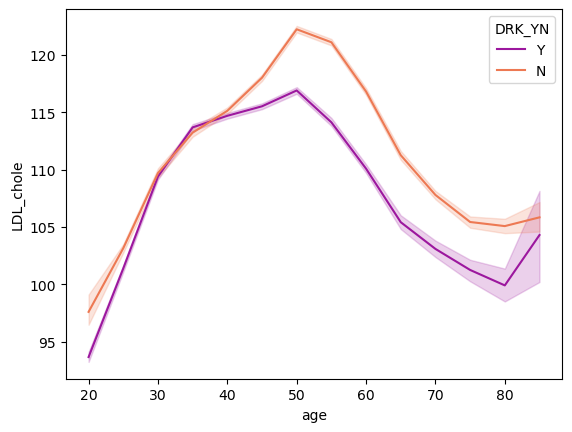

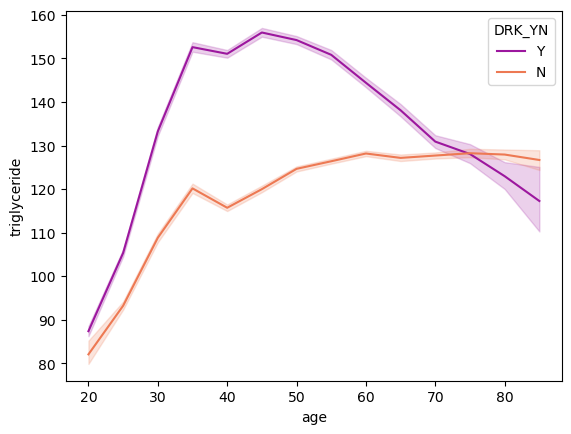

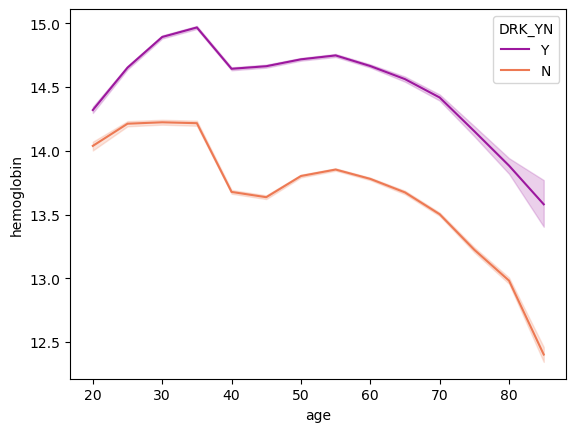

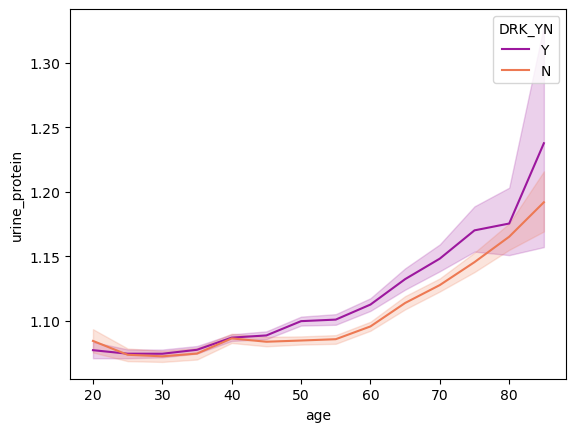

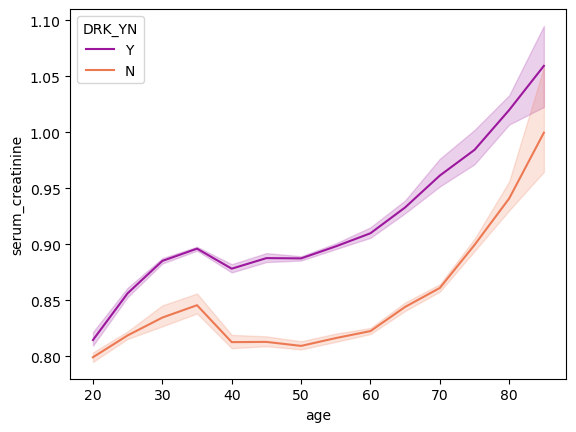

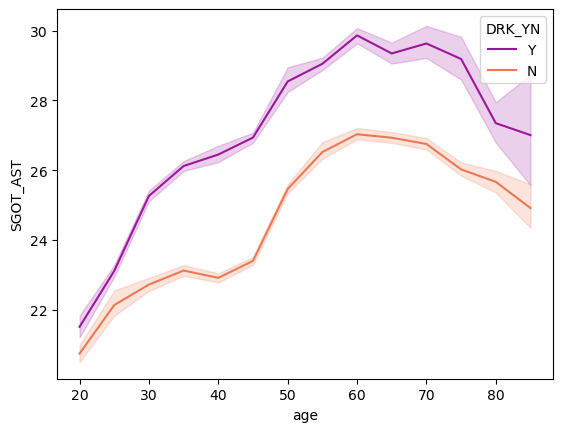

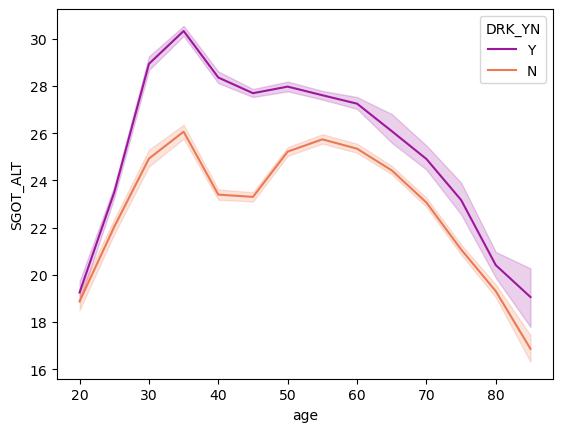

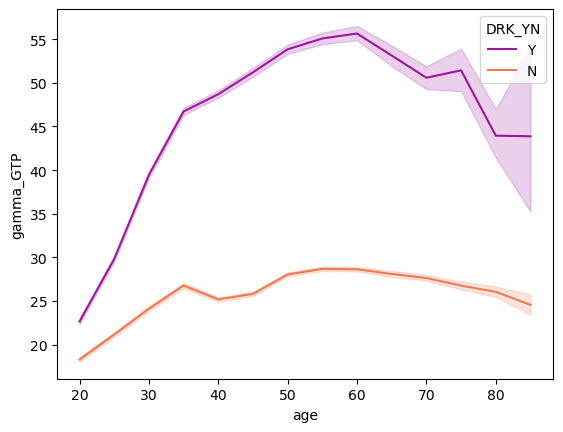

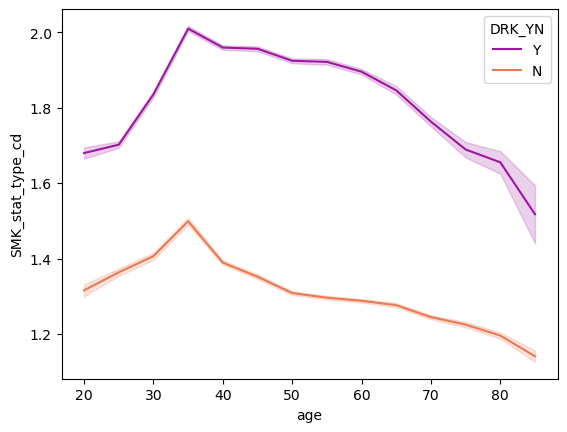

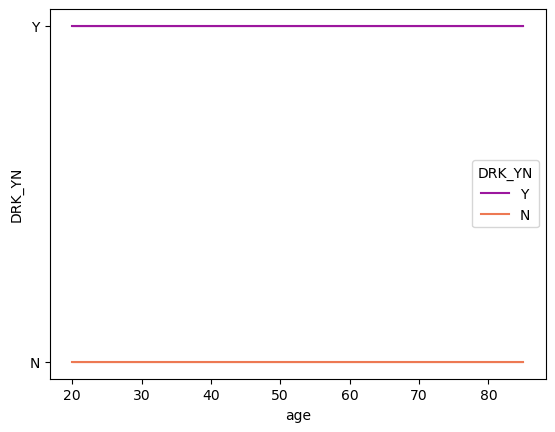

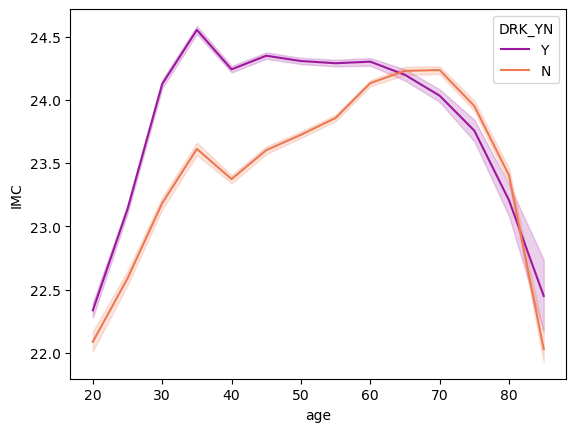

In [12]:
for i in df.columns:
    sns.lineplot(
        data=df,
        x="age",
        y=i,
        hue="DRK_YN",
        palette="plasma"
    )
    plt.show()

### grafico de barras del estado de bebedor, respecto al sexo y el resto de variables

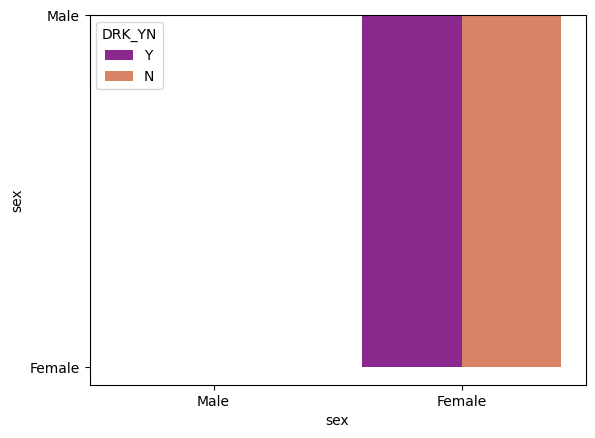

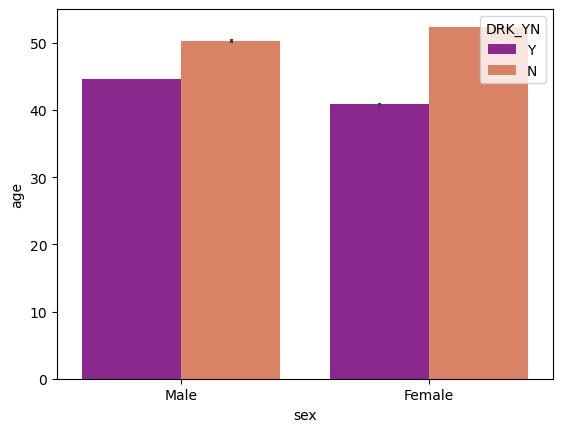

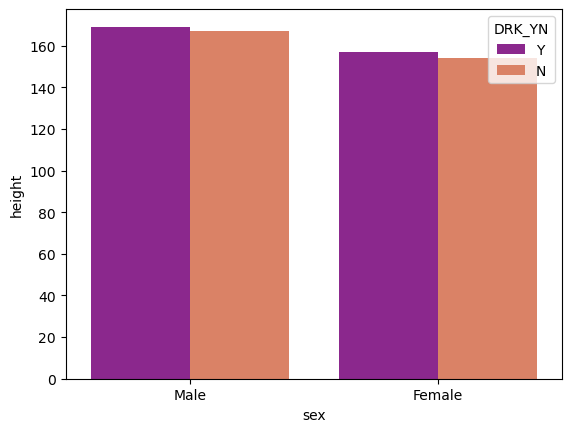

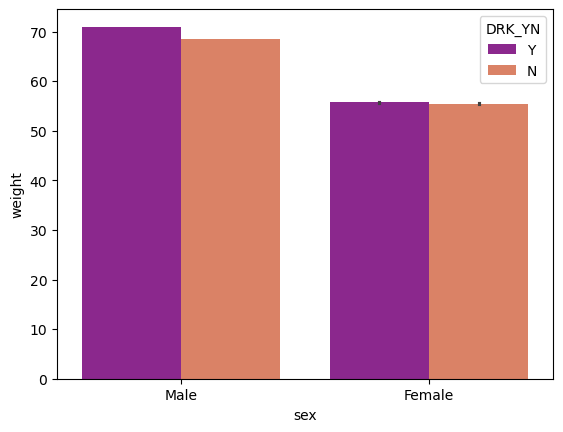

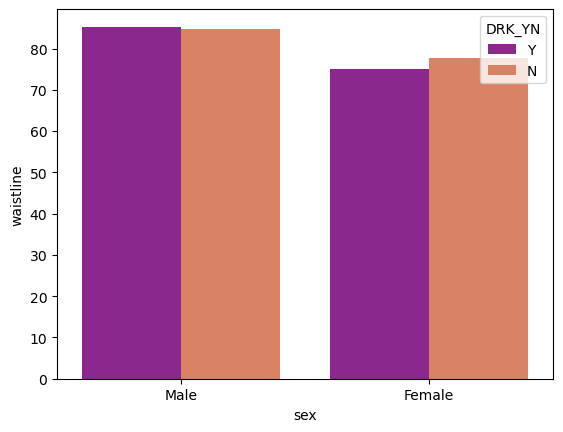

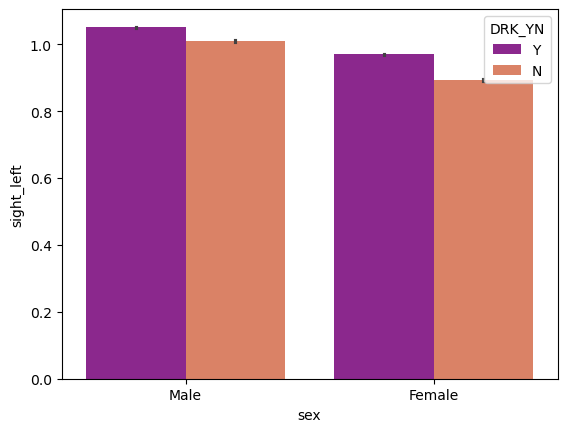

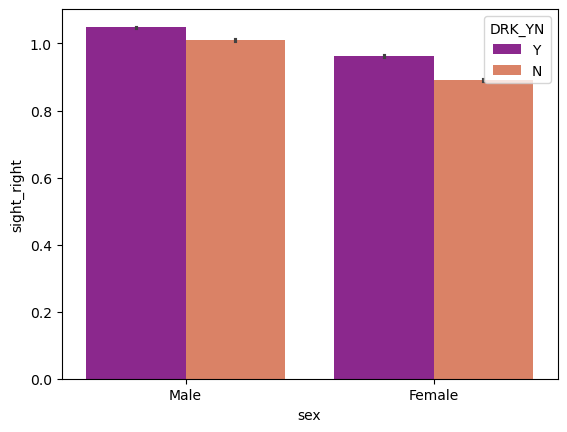

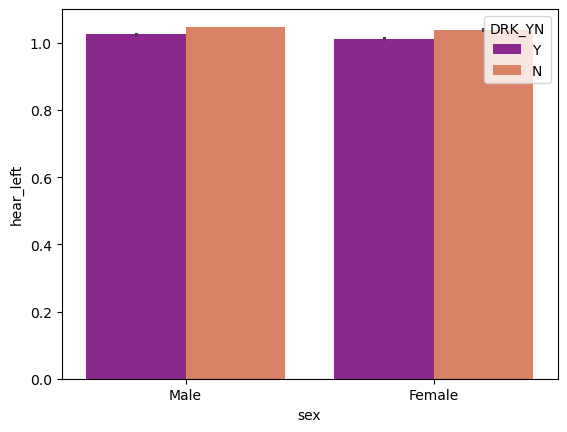

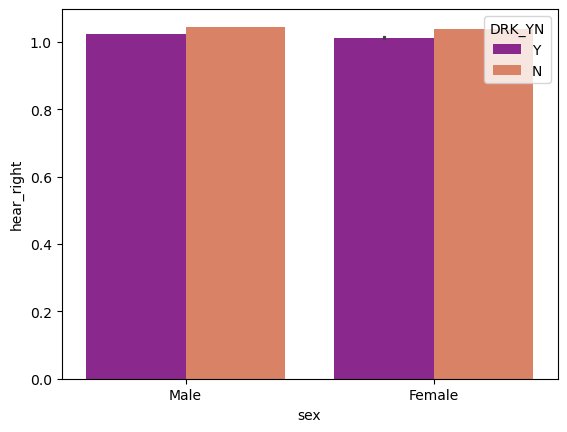

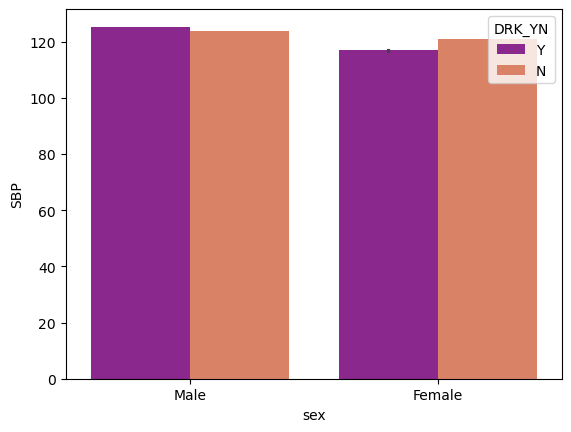

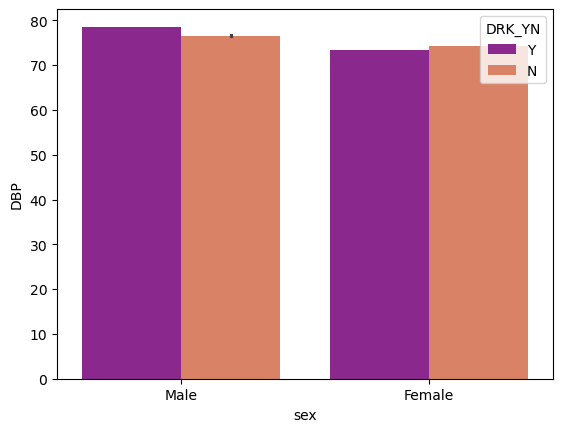

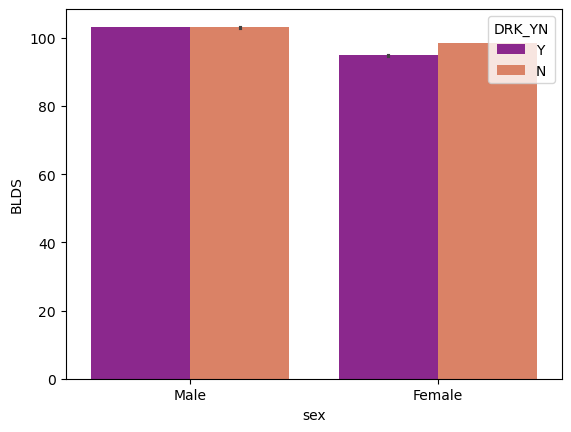

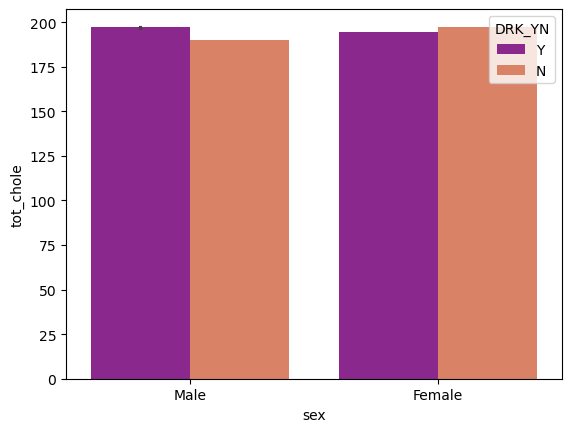

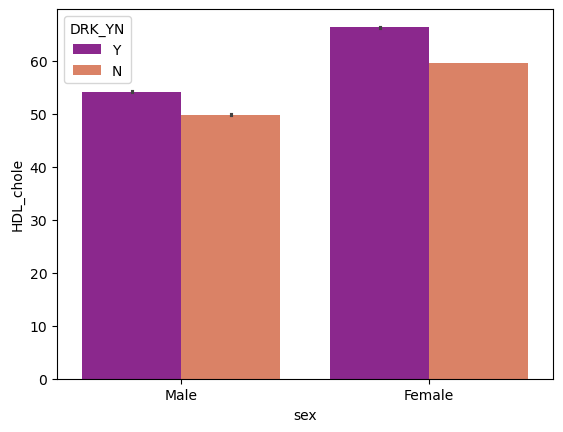

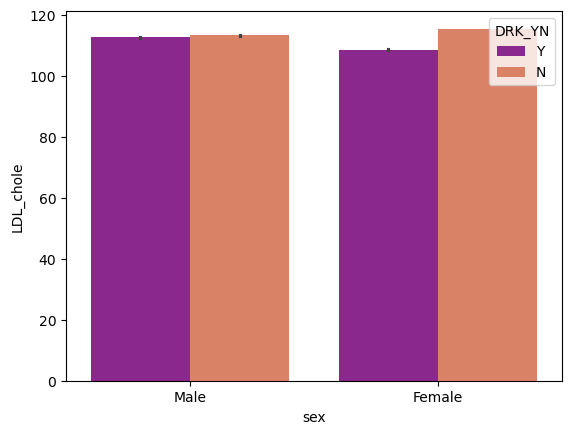

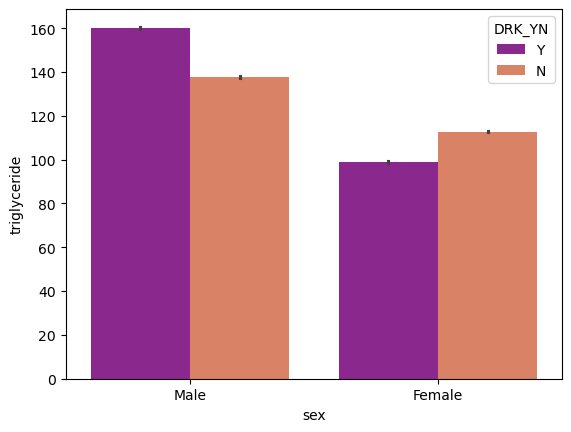

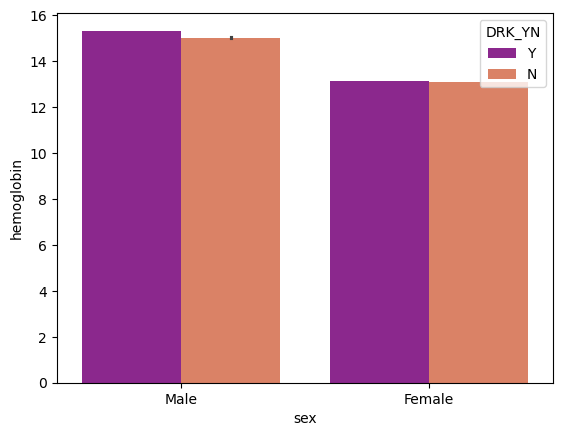

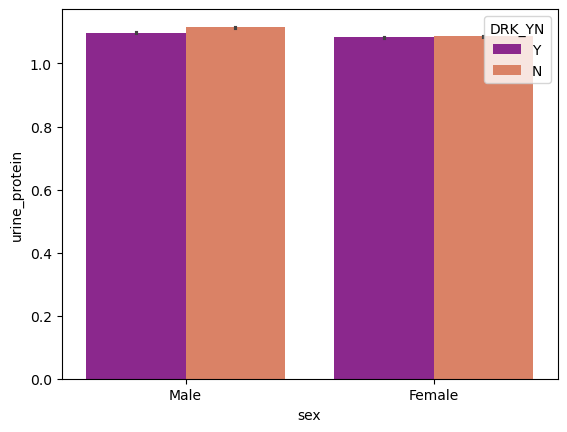

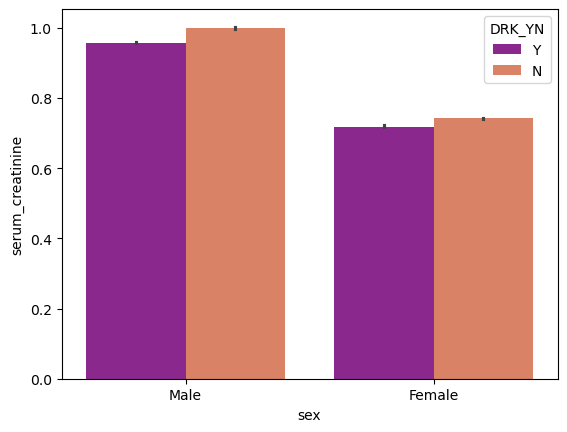

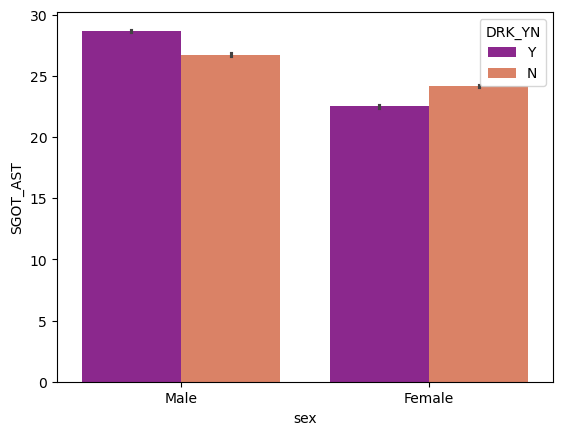

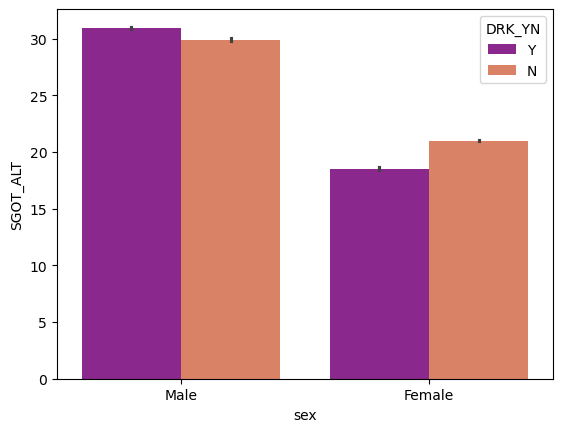

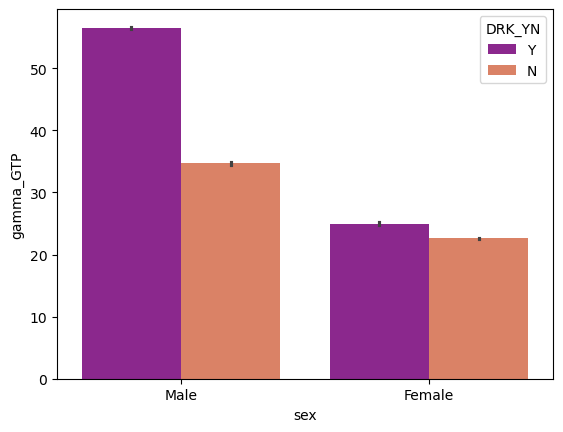

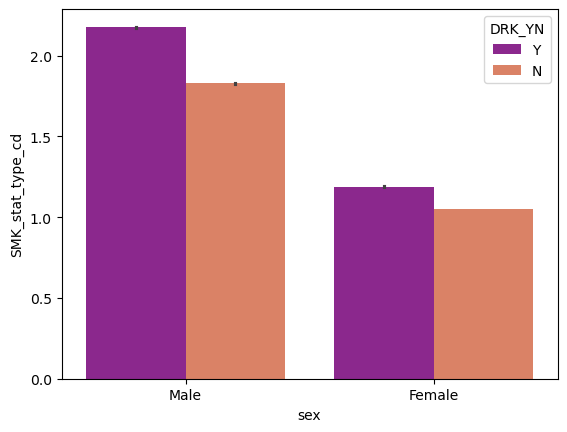

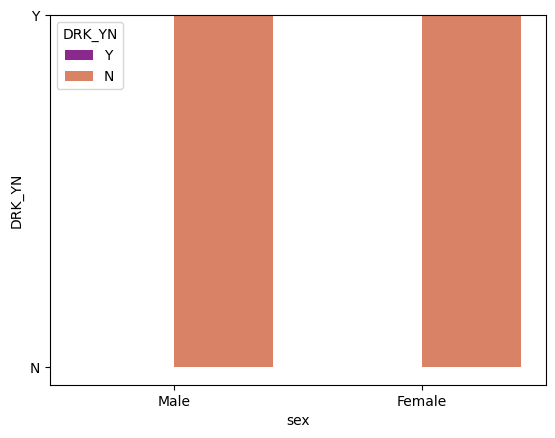

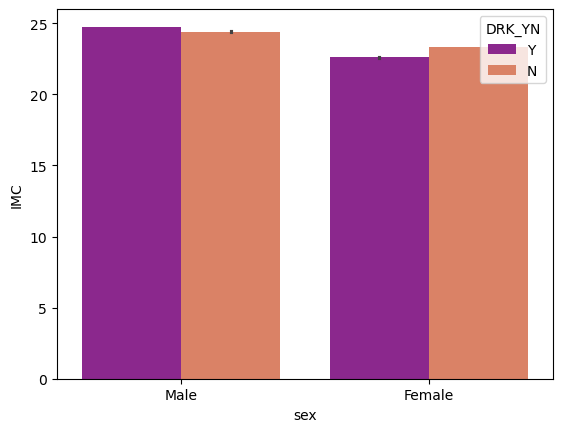

In [13]:
for i in df.columns:
    sns.barplot(
        data=df,
        x="sex",
        y=i,
        hue="DRK_YN",
        palette="plasma"
    )
    plt.show()

### grafico de barras del estado de fumador, respecto al sexo y el resto de variables

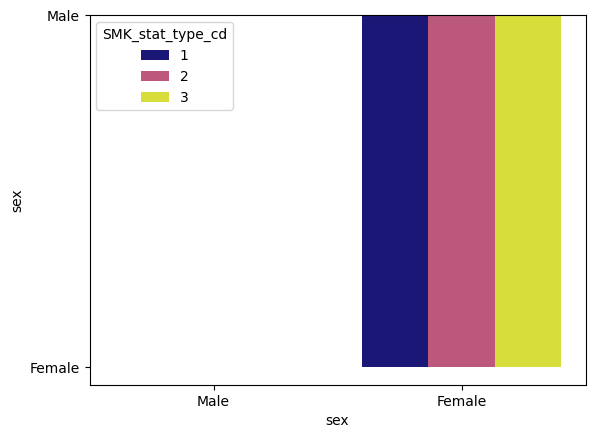

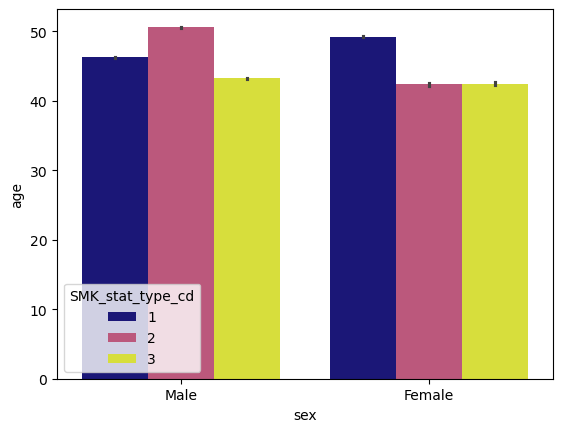

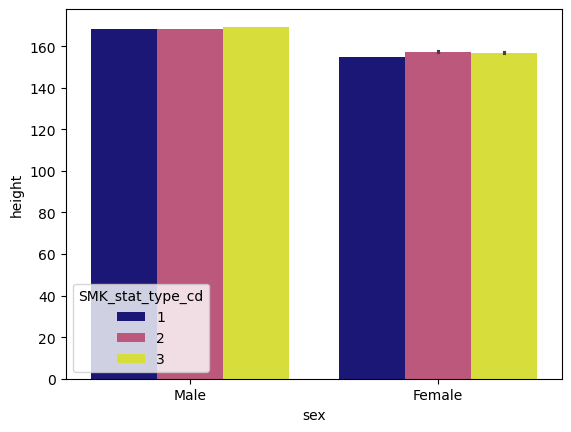

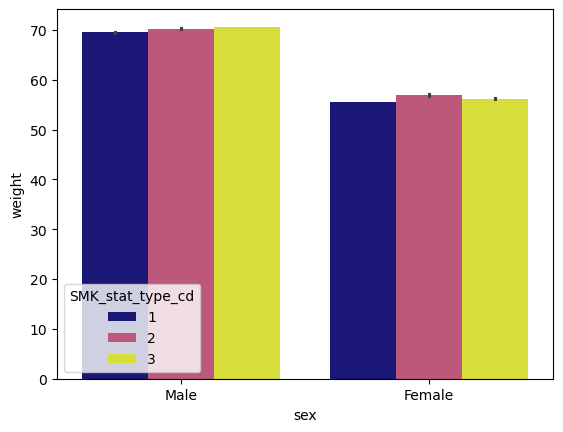

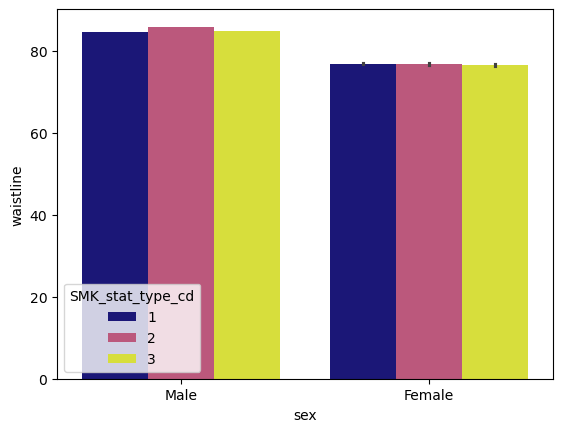

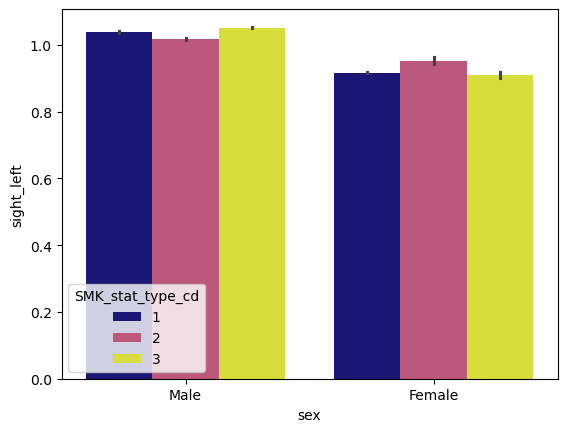

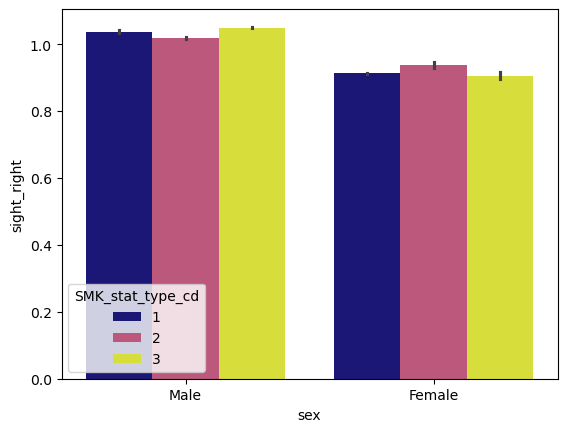

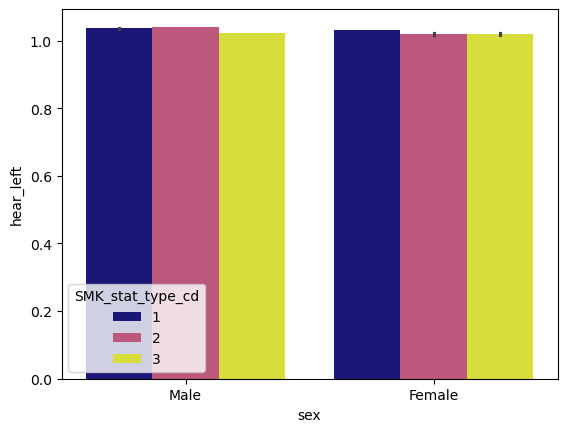

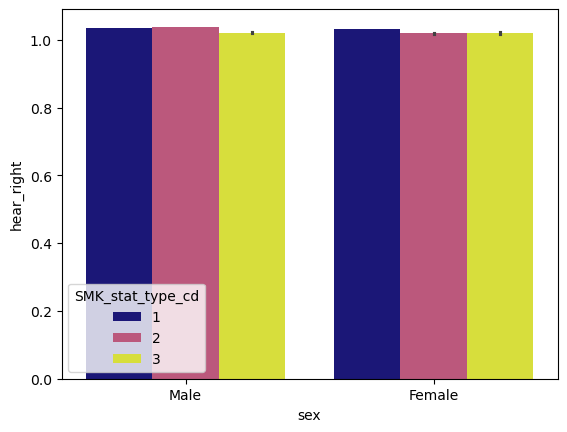

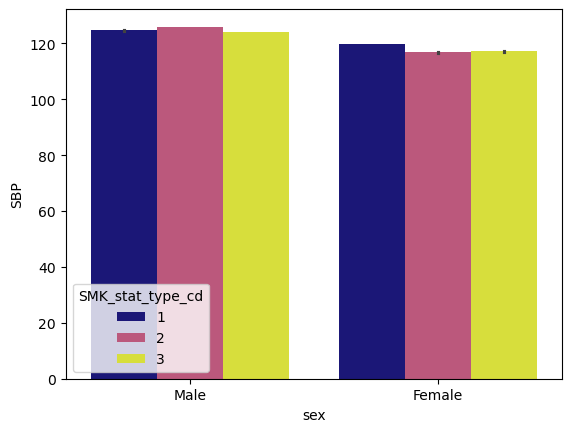

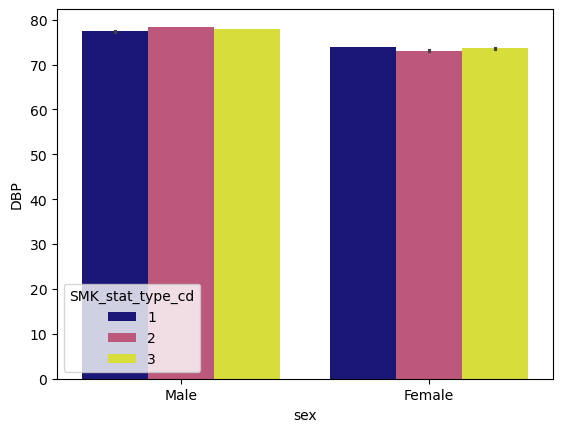

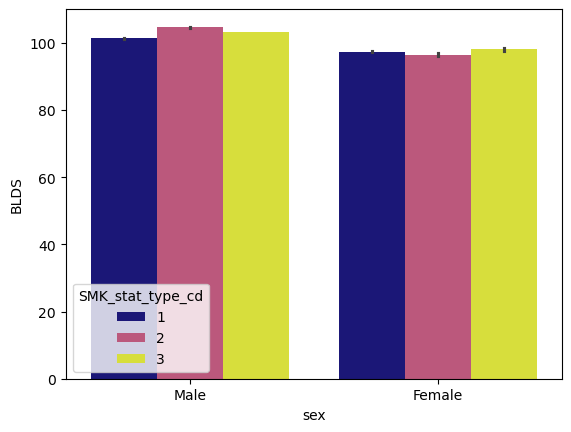

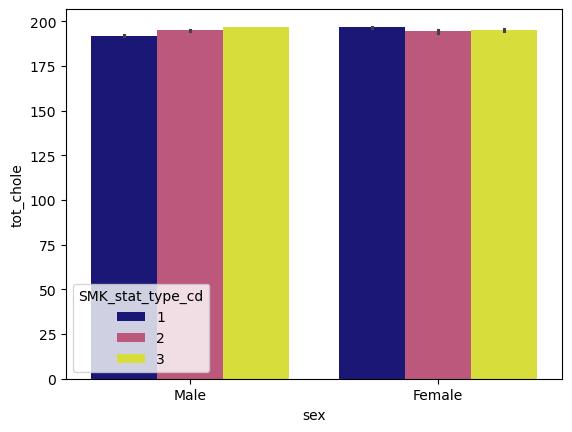

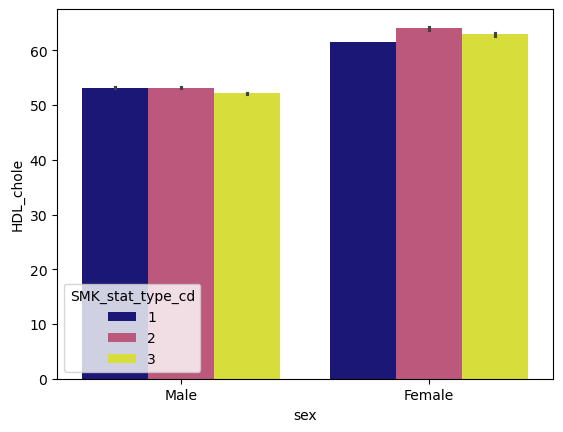

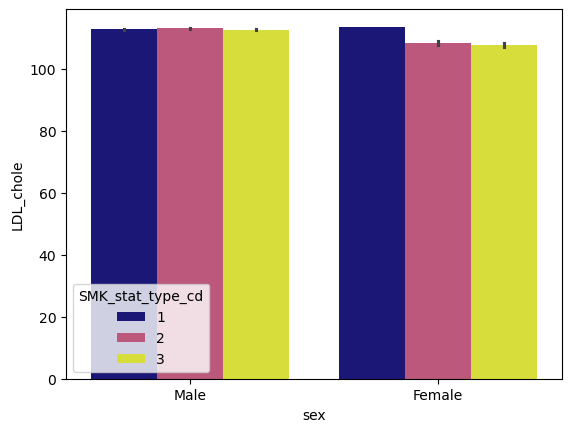

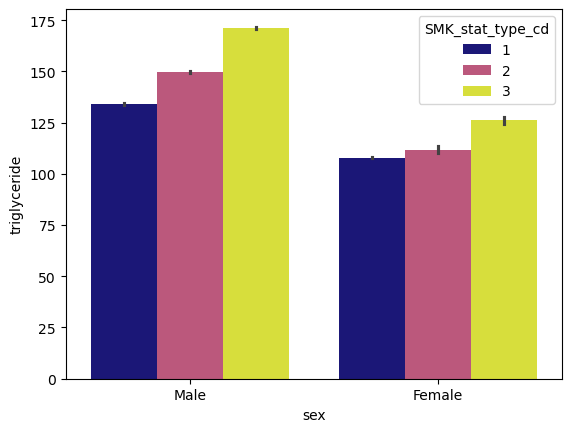

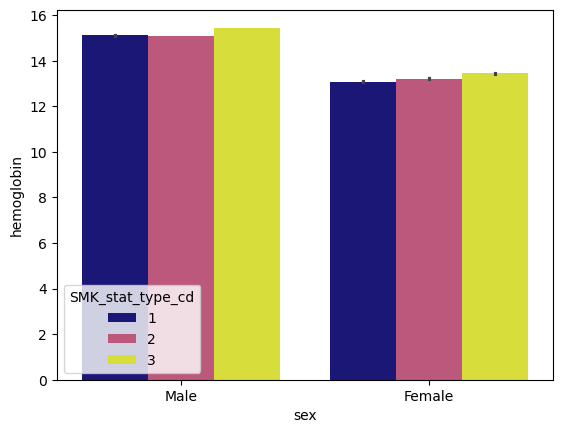

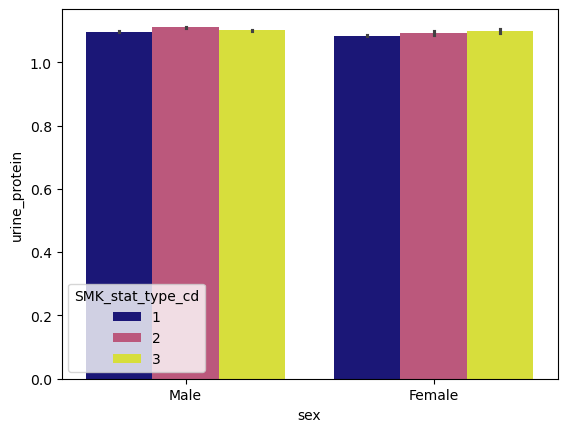

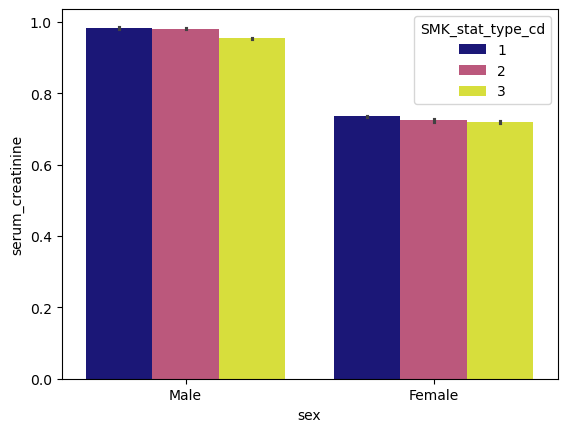

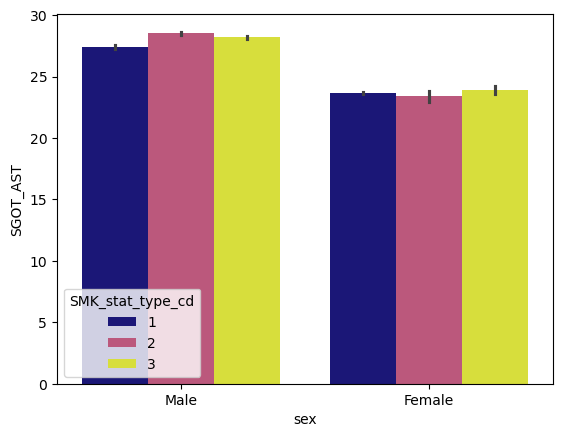

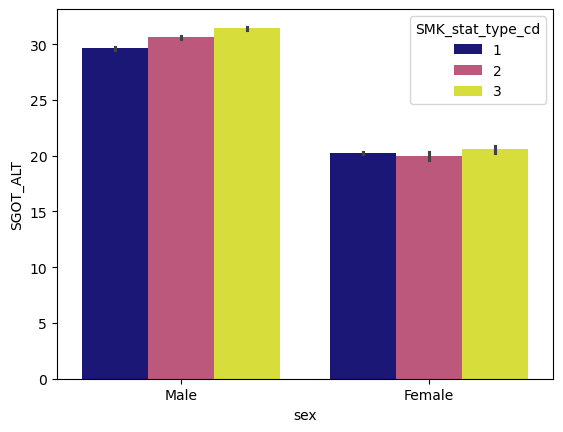

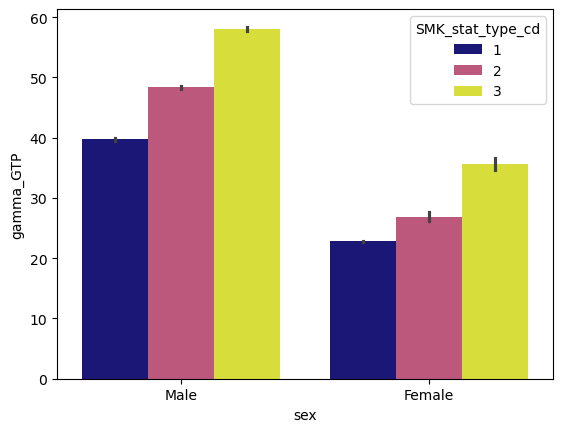

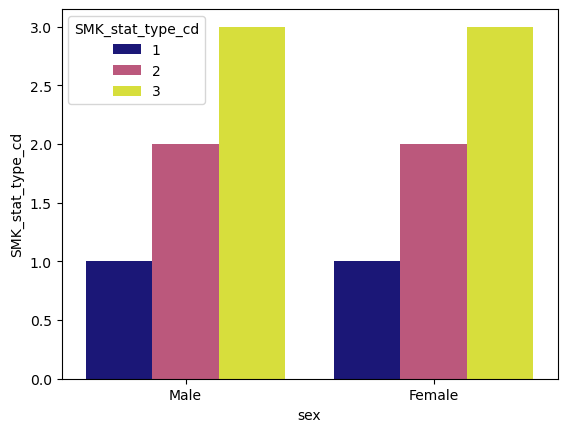

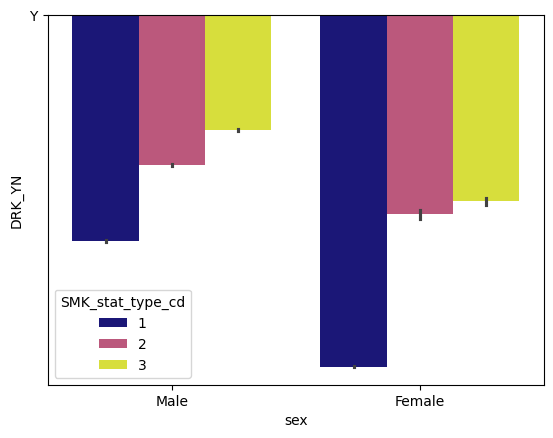

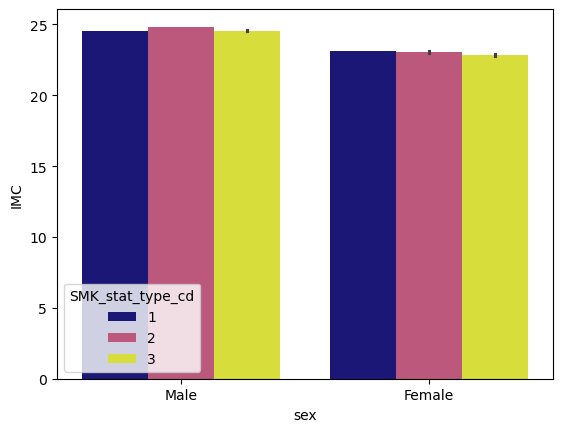

In [14]:
for i in df.columns:
    sns.barplot(
        data=df,
        x="sex",
        y=i,
        hue="SMK_stat_type_cd",
        palette="plasma"
    )
    plt.show()

### creacion columna Smoking_Drinking_Status

CREAR COLUMNAS:
1 - Si fuma + Si bebe
2 - Si fuma + No bebe
3- No fuma + Si bebe
4- No fuma + No bebe
5- ha dejado de fumar + si bebe
6- ha dejado de fumar + no bebe

In [15]:
def assign_status(row):
    if row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "Y":
        return "Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "N":
        return "Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "Y":
        return "No Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "N":
        return "No Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "Y":
        return "Ha dejado de fumar y Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "N":
        return "Ha dejado de fumar y No Bebe"
    else:
        return "Otro"


df["Smoking_Drinking_Status"] = df.apply(assign_status, axis=1)

df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0          1   
1  Male   30     180      80       89.0         0.9          1.2          1   
2  Male   40     165      75       91.0         1.2          1.5          1   
3  Male   50     175      80       91.0         1.5          1.2          1   
4  Male   50     165      60       80.0         1.0          1.2          1   

   hear_right  SBP  ...  hemoglobin  urine_protein  serum_creatinine  \
0           1  120  ...        17.1              1               1.0   
1           1  130  ...        15.8              1               0.9   
2           1  120  ...        15.8              1               0.9   
3           1  145  ...        17.6              1               1.1   
4           1  138  ...        13.8              1               0.8   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN        IMC  \
0        21        35         40                 1       Y  25.951557   
1        20        36         27                 3       N  24.691358   
2        47        32         68                 1       N  27.548209   
3        29        34         18                 1       N  26.122449   
4        19        12         25                 1       N  22.038567   

   Smoking_Drinking_Status  
0           No Fuma y Bebe  
1           Fuma y No Bebe  
2        No Fuma y No Bebe  
3        No Fuma y No Bebe  
4        No Fuma y No Bebe  

[5 rows x 26 columns]